In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

D:\OPP\compVision\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

from numpy import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pymystem3 import Mystem
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
df = pd.read_csv('ReviewsAll.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,Review,Status
0,"\n Если вы знаете, насколько дороги...",1
1,\n Попробовали новую систему заказа...,1
2,\n Почти десять дней отчаянного вес...,1
3,"\n Кто бы, , что не говорил о вреде...",1
4,Всем привет! Я давно пользуюсь доставкой Доми...,1
...,...,...
9069,"\n Была в Якитории и не раз, излюбл...",1
9070,\n Это отличный ресторан и я люблю ...,1
9071,\n Ужинала в шоколаднице в Долгопру...,0
9072,"\n Отвратительное обслуживание, тет...",0


In [4]:
print(df['Status'].value_counts())

1    5399
0    3675
Name: Status, dtype: int64


In [5]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
corpus = []
for i in range(len(df.index)):
    report = re.sub("[^А-я]", " ", str(df["Review"][i]))
#     report = Mystem.lemmatize(str(dataset["Report"][i]).lower())
    report = report.lower()
    report = report.split()
    ps = PorterStemmer()
    report = [ps.stem(word) for word in report if not word in set(stopwords.words("russian"))]
    report = " ".join(report)
    corpus.append(report)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=20000)
tfidf_matrix = tfidf.fit_transform(corpus).todense()
vocab = tfidf.vocabulary_
vocab

{'знаете': 4956,
 'насколько': 8043,
 'дорогие': 3218,
 'капсулы': 5760,
 'кофемашины': 6734,
 'шоколаднице': 19576,
 'купить': 6971,
 'капсул': 5759,
 'разными': 12864,
 'вкусами': 1518,
 'реально': 13258,
 'классные': 6125,
 'вкусы': 1600,
 'попробуйте': 10546,
 'обязательно': 8833,
 'попробовали': 10543,
 'новую': 8532,
 'систему': 14468,
 'заказа': 4234,
 'очередной': 9520,
 'макдональдс': 7340,
 'приятно': 11658,
 'удивил': 17561,
 'сбербанку': 13953,
 'россии': 13641,
 'десять': 2635,
 'дней': 2856,
 'веселья': 1284,
 'подарил': 9998,
 'бар': 301,
 'явно': 19913,
 'вспомнить': 1859,
 'ближайшие': 481,
 'дни': 2859,
 'обожаю': 8702,
 'шишас': 19519,
 'последней': 10663,
 'капли': 5749,
 'последнего': 10661,
 'коктейля': 6271,
 'говорил': 2186,
 'вреде': 1817,
 'пищи': 9856,
 'мака': 7316,
 'читайте': 19306,
 'таблицы': 16444,
 'соблюдать': 15031,
 'суточные': 16195,
 'нормы': 8569,
 'нормально': 8559,
 'всем': 1849,
 'привет': 11126,
 'давно': 2432,
 'пользуюсь': 10421,
 'доставко

In [27]:
import pickle
saveVocab = open("savedVocab.pkl", "wb")
pickle.dump(vocab, saveVocab)
saveVocab.close()

In [8]:
w = len(vocab)
s = len(corpus)
matrix = np.zeros((s, w))

for i in range(s):
    senLine = corpus[i].split(" ")
    for word in senLine:
        if word!='' and word in vocab.keys():
            matrix[i][vocab[word]] += 1

In [9]:
train = df[:7000]
train['Review'] = matrix.tolist()[0:7000]
listOfLists = train['Review'].values.tolist()
dataset = tf.constant(listOfLists)
dataset

D:\OPP\compVision\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<tf.Tensor: shape=(7000, 20000), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [10]:
model = Sequential()
model.add(Dense(200, input_dim = len(train['Review'][0]), activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "sigmoid"))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-4, momentum=0.9, nesterov=True, name="SGD")
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4000200   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 4,020,502
Trainable params: 4,020,502
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(dataset, train['Status'], epochs = 40, batch_size = 64)

Epoch 1/40
110/110 [==============================] - 4s 20ms/step - loss: 0.6107 - accuracy: 0.6526
Epoch 2/40
110/110 [==============================] - 2s 19ms/step - loss: 0.4553 - accuracy: 0.7969
Epoch 3/40
110/110 [==============================] - 2s 19ms/step - loss: 0.3487 - accuracy: 0.8619
Epoch 4/40
110/110 [==============================] - 2s 19ms/step - loss: 0.2731 - accuracy: 0.8990
Epoch 5/40
110/110 [==============================] - 2s 19ms/step - loss: 0.2217 - accuracy: 0.9197
Epoch 6/40
110/110 [==============================] - 2s 19ms/step - loss: 0.1642 - accuracy: 0.9447
Epoch 7/40
110/110 [==============================] - 2s 19ms/step - loss: 0.1316 - accuracy: 0.9560
Epoch 8/40
110/110 [==============================] - 2s 19ms/step - loss: 0.1028 - accuracy: 0.9684
Epoch 9/40
110/110 [==============================] - 2s 19ms/step - loss: 0.0715 - accuracy: 0.9804 0s - loss: 0.0716 - accuracy: 0.98
Epoch 10/40
110/110 [==============================] - 2

In [20]:
model.save('savedModel');

INFO:tensorflow:Assets written to: savedModel\assets


dict_keys(['loss', 'accuracy'])


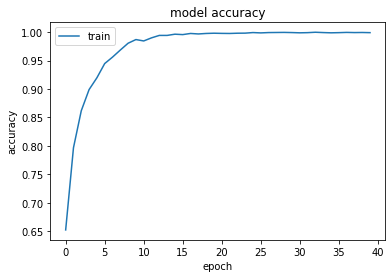

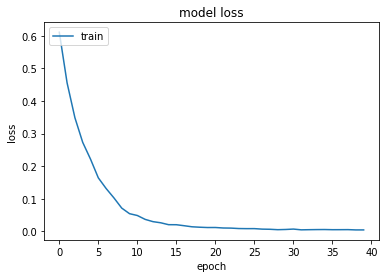

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
testBD = df[-2000:]
testBD = testBD.sample(frac=1).reset_index(drop=True)
testBD
testBD.to_csv('testSaved.csv', index=False)

In [35]:
# testBD = pd.read_csv('Reviews-GadkiyKoyot.csv')
# testBD = testBD.sample(frac=1).reset_index(drop=True)
# testBD

In [29]:
corp = []
for i in range(len(testBD.index)):
    report = re.sub("[^А-я]", " ", str(testBD["Review"][i]))
#     report = Mystem.lemmatize(str(dataset["Report"][i]).lower())
    report = report.lower()
    report = report.split()
    ps = PorterStemmer()
    report = [ps.stem(word) for word in report if not word in set(stopwords.words("russian"))]
    report = " ".join(report)
    corp.append(report)

In [30]:
w1 = len(vocab)
s1 = len(corp)
testMatrix = np.zeros((s1, w1))

for i in range(s1):
    senLine = corp[i].split(" ")
    for word in senLine:
        if word!='' and word in vocab.keys():
            testMatrix[i][vocab[word]] += 1

In [31]:
test = testBD
test['Review'] = testMatrix.tolist()
listOfLists = test['Review'].values.tolist()
testX = tf.constant(listOfLists)
testY = test.iloc[:, 1].values
testX

<tf.Tensor: shape=(2000, 20000), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [32]:
score = model.evaluate(testX, testY)

63/63 [==============================] - 1s 6ms/step - loss: 0.7386 - accuracy: 0.8500


In [33]:
preds = model.predict(testX, batch_size=None, verbose=0, steps = None)
test_prediction_label = np.argmax(preds.T, axis = 0)
pred_test_labels = []
for row in test_prediction_label:
        pred_test_labels.append(row)

data = {'Predicted':pred_test_labels,
        'Actual':testY}
compare = pd.DataFrame(data)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
# #     print(compare)

In [34]:
confusion_matrix(testY, test_prediction_label) 

array([[ 680,  153],
       [ 147, 1020]], dtype=int64)

In [35]:
print(classification_report(test_prediction_label, testY))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       827
           1       0.87      0.87      0.87      1173

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

